## Imports

In [1]:
import xpress as xp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
%load_ext line_profiler

In [3]:
%matplotlib widget

In [4]:
xp.controls.outputlog = 1
xp.controls.threads = 1
xp.controls.scaling = 0
xp.controls.presolve = 0
xp.controls.feastol = 1.e-7
xp.controls.optimalitytol = 1.e-7
xp.setOutputEnabled(True)

In [5]:
def retrieve_problem(year,week,output_path,itr=1):
    model = xp.problem()
    model.read(output_path+f"/problem-{year}-{week}--optim-nb-{itr}.mps")
    return(model)

## Export pour le POC

In [6]:
# study_path = "D:/Users/gerbauxjul/Documents/6-Etudes Antares/bug_milp"
study_path = "D:/Users/gerbauxjul/Documents/6-Etudes Antares/optimization_problem"

In [10]:
# output_path_sirius = study_path+"/output/20241112-1049eco-accurate_sirius_export_mps"
# output_path_xpress = study_path+"/output/20241112-1042eco-export_mps_xpress"
output_path_sirius = study_path+"/output/20241118-1751eco-export_mps_with_hydro"

In [11]:
m_sirius_itr1 = retrieve_problem(1,3,output_path_sirius,itr=1)
# m_xpress_itr1 = retrieve_problem(1,1,output_path_xpress,itr=1)

Reading Problem Pb Solve
Problem Statistics
        1684 (      1 spare) rows
        2352 (      0 spare) structural columns
       13439 (   1680 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members



In [12]:
m_sirius_itr1.write("problem.lp","l")

In [37]:
63/5000*100*24

30.240000000000002

In [34]:
0.550482*5000/100

27.524100000000004

In [20]:
1524.048197384/168

9.071715460619048

In [ ]:
m_xpress_itr1.solve()

FICO Xpress v8.14.8, Hyper, solve started 18:14:49, Nov 12, 2024
Heap usage: 1240KB (peak 1240KB, 955KB system)
Minimizing MILP newProb using 1 thread and up to 31GB memory, with these control settings:
SCALING = 0
PRESOLVE = 0
OUTPUTLOG = 1
THREADS = 1
FEASTOL = 1.e-7
OPTIMALITYTOL = 1.e-7
Original problem has:
      2352 rows         2016 cols        12264 elements      1344 globals

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  9.00e+02] / [ 1.00e+00,  9.00e+02]
  RHS and bounds [min,max] : [ 5.00e+00,  7.44e+03] / [ 5.00e+00,  7.44e+03]
  Objective      [min,max] : [ 5.88e-04,  2.68e+04] / [ 5.88e-04,  2.68e+04]

Will try to keep branch and bound tree memory usage below 24.4GB
Crash basis containing 336 structural columns created
 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0           .000000      D      1   168        .098710     0
  1035       15233051.50      D      0     0     

In [10]:
vars_sirius_itr1 = m_sirius_itr1.getVariable()
names_ref = [v.name for v in vars_sirius_itr1]

In [11]:
def create_dataframe_variables(m,names):
    idx = [i for i in range(len(names))]
    vars = m.getVariable()
    df_vars = pd.DataFrame([vars[i] for i in idx], columns=["var"])
    df_vars["names"] = [names[i] for i in idx]
    df_vars["split"] = df_vars["names"].apply(lambda x:x.strip().split("::"))
    df_vars["name_var"] = df_vars["split"].apply(lambda x:x[0])
    df_vars["antares_object"] = df_vars["split"].apply(lambda x:x[1].split("<")[0])
    df_vars["name_antares_object"] = df_vars["split"].apply(lambda x:x[1].split("<")[1].split(">")[0])
    df_vars["subobject"] = df_vars["split"].apply(lambda x:x[2] if len(x)>=4 else "None")
    df_vars["time"] = df_vars["split"].apply(lambda x:int(x[-1].split("<")[1].split(">")[0]))
# coltype = []
# m.getcoltype(coltype, 0, m.attributes.cols - 1)
# df_vars['coltype'] = coltype
    bounds = []
    m.getlb(bounds, 0, m.attributes.cols - 1)
    df_vars['lb'] = [bounds[i] for i in idx]
    bounds = []
    m.getub(bounds, 0, m.attributes.cols - 1)
    df_vars['ub'] = [bounds[i] for i in idx]
    df_vars = df_vars.assign(sol=[m.getSolution(i) for i in idx])

    return df_vars

In [12]:
df_vars_itr1 = create_dataframe_variables(m_xpress_itr1,names_ref)

In [13]:
df_vars_itr1

,var,names,split,name_var,antares_object,name_antares_object,subobject,time,lb,ub,sol
0,C1,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<base>,0,0.0,4.500000e+03,4493.0
1,C2,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<ccgt>,0,0.0,2.400000e+03,180.0
2,C3,PositiveUnsuppliedEnergy::area<area>::hour<0> ...,"[PositiveUnsuppliedEnergy, area<area>, hour<0>]",PositiveUnsuppliedEnergy,area,area,None,0,0.0,4.773000e+03,0.0
3,C4,NegativeUnsuppliedEnergy::area<area>::hour<0> ...,"[NegativeUnsuppliedEnergy, area<area>, hour<0>]",NegativeUnsuppliedEnergy,area,area,None,0,0.0,1.000000e+20,0.0
4,C5,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<base>,1,0.0,4.500000e+03,4129.0
...,...,...,...,...,...,...,...,...,...,...,...
2011,C2012,NumberBreakingDownDispatchableUnits::area<area...,"[NumberBreakingDownDispatchableUnits, area<are...",NumberBreakingDownDispatchableUnits,area,area,ThermalCluster<ccgt>,166,-0.0,0.000000e+00,-0.0
2012,C2013,NODU::area<area>::ThermalCluster<ccgt>::hour<1...,"[NODU, area<area>, ThermalCluster<ccgt>, hour<...",NODU,area,area,ThermalCluster<ccgt>,167,-0.0,8.000000e+00,3.0
2013,C2014,NumberStartingDispatchableUnits::area<area>::T...,"[NumberStartingDispatchableUnits, area<area>, ...",NumberStartingDispatchableUnits,area,area,ThermalCluster<ccgt>,167,-0.0,1.000000e+20,-0.0
2014,C2015,NumberStoppingDispatchableUnits::area<area>::T...,"[NumberStoppingDispatchableUnits, area<area>, ...",NumberStoppingDispatchableUnits,area,area,ThermalCluster<ccgt>,167,-0.0,1.000000e+20,1.0


In [14]:
df_vars_itr1[(df_vars_itr1.subobject=="ThermalCluster<base>")&(df_vars_itr1.time>=96)&(df_vars_itr1.time<=96)]

,var,names,split,name_var,antares_object,name_antares_object,subobject,time,lb,ub,sol
384,C385,DispatchableProduction::area<area>::ThermalClu...,"[DispatchableProduction, area<area>, ThermalCl...",DispatchableProduction,area,area,ThermalCluster<base>,96,0.0,4.500000e+03,4500.0
1056,C1057,NODU::area<area>::ThermalCluster<base>::hour<9...,"[NODU, area<area>, ThermalCluster<base>, hour<...",NODU,area,area,ThermalCluster<base>,96,-0.0,5.000000e+00,5.0
1057,C1058,NumberStartingDispatchableUnits::area<area>::T...,"[NumberStartingDispatchableUnits, area<area>, ...",NumberStartingDispatchableUnits,area,area,ThermalCluster<base>,96,-0.0,1.000000e+20,-0.0
1058,C1059,NumberStoppingDispatchableUnits::area<area>::T...,"[NumberStoppingDispatchableUnits, area<area>, ...",NumberStoppingDispatchableUnits,area,area,ThermalCluster<base>,96,-0.0,1.000000e+20,0.0
1059,C1060,NumberBreakingDownDispatchableUnits::area<area...,"[NumberBreakingDownDispatchableUnits, area<are...",NumberBreakingDownDispatchableUnits,area,area,ThermalCluster<base>,96,-0.0,0.000000e+00,-0.0


In [15]:
df_vars_itr1.loc[384,"sol"]

4500.000000000001

In [ ]:
df_vars_itr1.loc[1056,"sol"]

5.000000000000001

<Axes: xlabel='time', ylabel='sol'>

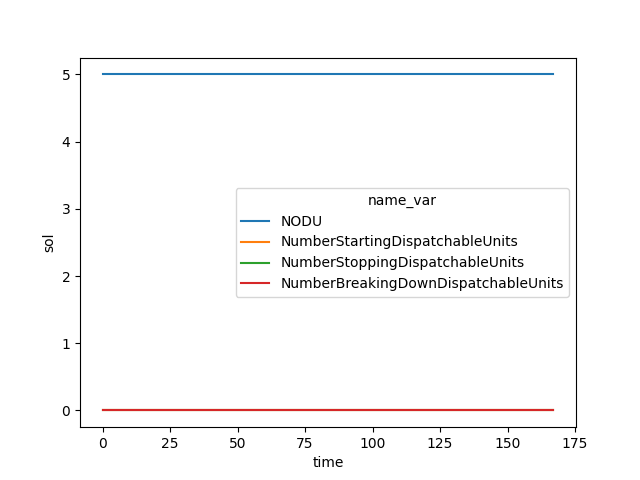

In [27]:
plt.figure()
sns.lineplot(data=df_vars_itr1[(df_vars_itr1.subobject=="ThermalCluster<base>")&(df_vars_itr1.name_var!="DispatchableProduction")],x="time",y="sol",hue="name_var")

<Axes: xlabel='time', ylabel='sol'>

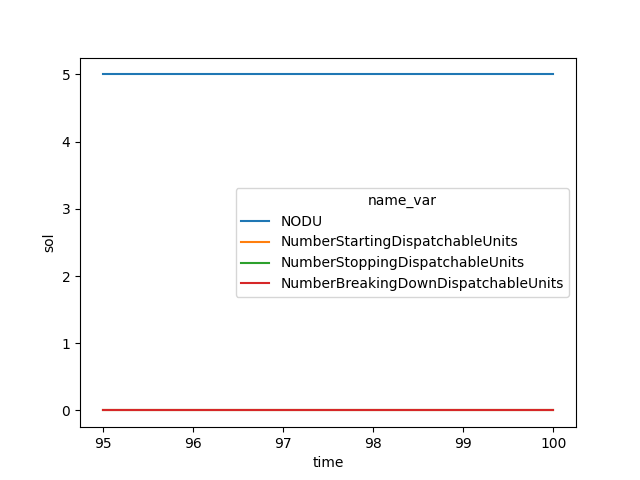

In [30]:
plt.figure()
sns.lineplot(data=df_vars_itr1[(df_vars_itr1.subobject=="ThermalCluster<base>")&(df_vars_itr1.name_var!="DispatchableProduction")&(df_vars_itr1.time>=95)&(df_vars_itr1.time<=100)],x="time",y="sol",hue="name_var")